**请填写你的姓名与学号**

In [ ]:
name=""
student_id=""

# 线性回归模型编程练习

In [5]:
# 查看个人持久化工作区文件
!ls

'ls' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


## 线性回归模型

回归问题是非常常见的一类问题，目的是寻找变量之间的关系。比如要从数据中寻找房屋面积与价格的关系，年龄和身高的关系，气体压力和体积的关系等等。而机器学习要做的正是要让机器自己来学习这些关系，并为对未知的情况做出预测。

对于线性回归，假设变量之间的关系是线性的，即：
$$h_{\theta}(x)= \theta_{0} + \theta_{1} x$$
其中 $\pmb{\theta}$ 就是学习算法需要学习的参数，在线性回归的问题上，就是$\theta_{1}$和$\theta_{0}$，而 $x$ 是我们对于问题所选取的特征，也即输入。$h$表示算法得到的映射。

## 代价函数的表示

为了找到这个算法中合适的参数，我们需要制定一个标准。一般而言算法拟合出来的结果与真实的结果误差越小越好，试想一下如果算法拟合出来的结果与真实值的误差为零，那么就是说算法完美地拟合了数据。所以可以根据“真实值与算法拟合值的误差”来表示算法的“合适程度”。在线性回归中，我们经常使用最小二乘的思路构建代价函数：
$$J(\pmb{\theta}) = \frac{1}{2n}\sum_{i=1}^{n} \Big( h_{\theta}(x^{(i)}) - y^{(i)} \Big)^2$$
这里 $h_{\theta}(x^{(i)})$ 由假设模型得出。对线性回归任务，代价函数可以展开为：
$$J(\pmb{\theta}) = \frac{1}{2n}\sum_{i=1}^{n} \Big(\theta_0 + \theta_1x^{(i)}-y_{i}) \Big)^2$$
误差函数的值越小，则代表算法拟合结果与真实结果越接近。

## 梯度下降

梯度下降算法沿着误差函数的反向更新$\theta$的值，知道代价函数收敛到最小值。梯度下降算法更新$\theta_i$的方法为：
$$\theta_{j} = \theta_{j} - \alpha\frac{\partial }{\partial \theta_{j}}J(\pmb{\theta}), \qquad j=0, 1$$
其中 $\alpha$表示学习率。对于线性回归的的参数，可以根据代价函数求出其参数更新公式：
$$\begin{split}\frac{\partial J}{\partial \theta_{0} } &= \frac{1}{n}\sum_{i=1}^{n}\Big( \theta_0 + \theta_1 x^{(i)}-y^{(i)} \Big),\\
\frac{\partial J}{\partial \theta_{1} } &= \frac{1}{n}\sum_{i=1}^{n}\Big(\theta_0 + \theta_1x^{(i)}-y^{(i)}\Big)x^{(i)}.\end{split}$$

## 代码实现
现在让我们开始动手实现，首先让我们回顾一下numpy和matplotlib：

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def warm_up_exercise():
    """热身练习"""
    A = None
    # ====================== 你的代码 ==========================
    # 在下面加入你的代码，使程序返回一个 5x5 的单位矩阵
    # =========================================================
    A = np.eye(5) # 直接调用numpy中的eye()方法，来进行快速构造
    return A

# 当你的实现正确时，下面会输出一个单位矩阵：
print(warm_up_exercise())

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


你需要实现绘制数据集中图像的函数，当你的实现|正确时，你应该会得到如下的图像：
![散点图](./scatter.png)

Plotting Data ...



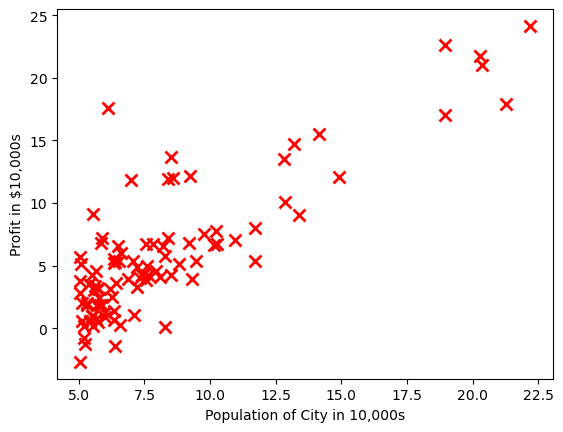

In [14]:
def plot_data(x, y):
    """绘制给定数据x与y的图像"""
    plt.figure()
    # ====================== 你的代码 ==========================
    # 绘制x与y的图像
    # 使用 matplotlib.pyplt 的命令 plot, xlabel, ylabel 等。
    # 提示：可以使用 'rx' 选项使数据点显示为红色的 "x"，
    #       使用 "markersize=8, markeredgewidth=2" 使标记更大

    # 给制数据

    # 设置y轴标题为 'Profit in $10,000s'
    
    # 设置x轴标题为 'Population of City in 10,000s'
    plt.plot(x,y,'rx',markersize=8,markeredgewidth=2) # 将x和y导入，然后将颜色形状设为red和‘x’，markersize设置标记的大小，markeredgewidth设置标记边缘线的宽度
    plt.ylabel('Profit in $10,000s') # 设置y轴标题
    plt.xlabel('Population of City in 10,000s') # 设置x轴标题
    plt.show() # 将画布进行展示
    # =========================================================
# 让我们测试一下你的实现是否正确
# 从txt中加载数据
print('Plotting Data ...\n')
data = np.loadtxt('./PRML_LR_data.txt', delimiter=',')
x, y = data[:, 0], data[:, 1]

# 绘图
plot_data(x, y)
plt.show()

现在运用所学的知识，对上述数据利用线性回归进行拟合。首先我们对要学习的参数和数据做一个准备:

In [17]:
# Add a column of ones to x
m = len(y)
X = np.ones((m, 2))
X[:, 1] = data[:, 0]

# initialize fitting parameters
theta = np.zeros((2, 1))
print(theta)
print(y.shape)
print(X.shape)
print((X @ theta).shape)
# Some gradient descent settings
iterations = 1500
alpha = 0.01

[[0.]
 [0.]]
(97,)
(97, 2)
(97, 1)


计算初始误差函数的值，你需要实现误差函数的计算：

In [20]:
def compute_cost(X, y, theta):
    """计算线性回归的代价。"""
    m = len(y)
    J = 0.0
    # ====================== 你的代码 ==========================
    # 计算给定 theta 参数下线性回归的代价
    # 请将正确的代价赋值给 J
    predictions = X @ theta  # @进行矩阵乘法来计算模型的预测值 结果为m×2 2×1->m×1
    errors = predictions - y.reshape(-1, 1) # 确保y是列向量 对应相减，得到对应的errors
    J = (1 / (2 * m)) * np.sum(errors ** 2) # 按照公式来对应计算全部偏差的平方和
    # =========================================================
    return J

# compute and display initial cost
# Expected value 32.07
J0 = compute_cost(X, y, theta)
print(J0)

32.072733877455676


现在你验证了代价计算的正确性，接下来就需要实现最核心的部分：梯度下降。在实现这一部分之前，确定你理解了上述各种变量及其表示。你需要完成梯度下降的核心代码部分：

In [23]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """执行梯度下降算法来学习参数 theta。"""
    m = len(y)
    J_history = np.zeros((num_iters,)) # 用来记录每次迭代后计算出来的代价值
    theta_history = [] # 用来记录每一次迭代后的θ值，用于后续的可视化
    for iter in range(num_iters):
        # ====================== 你的代码 ==========================
        # 计算给定 theta 参数下线性回归的梯度，实现梯度下降算法
        theta_history.append(theta.copy().flatten()) # 将当前的θ进行复制并进行拉平然后存入theta_history
        predictions = X @ theta # 通过当前的X与θ来计算得到对应的预测值
        errors = predictions - y.reshape(-1, 1) # 然后进行作差得到对应的errors
        gradient = (1 / m) * (X.T @ errors) # 通过公式推导求得对应梯度
        theta = theta - alpha * gradient # 进行梯度更新
        # =========================================================
        # 将各次迭代后的代价进行记录
        J_history[iter] = compute_cost(X, y, theta)

    return theta, J_history, theta_history

# run gradient descent
# Expected value: theta = [-3.630291, 1.166362]
theta, J_history, _ = gradient_descent(X, y, theta,
                                    alpha, iterations)
print(theta)
print(J_history)

[[-3.63029144]
 [ 1.16636235]]
[6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


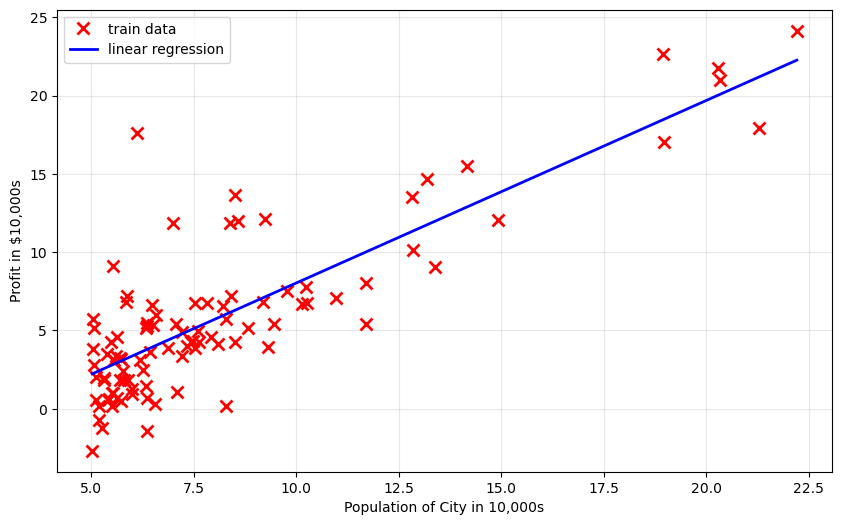

In [25]:
def plot_fit_result(X, y, theta):
    plt.figure(figsize=(10, 6))
    plt.plot(X[:,1], y, 'rx', markersize=8, markeredgewidth=2, label='train data') # 将训练样本画出来

    x_line = np.linspace(X[:, 1].min(), X[:, 1].max(), 100) # 创建100个点 覆盖x的最小值和最大值范围
    y_line = theta[0] + theta[1] * x_line # 通过公式进行对应y值的计算

    plt.plot(x_line, y_line, 'b-', linewidth=2, label='linear regression')
    plt.xlabel('Population of City in 10,000s') # 设置对应的图例
    plt.ylabel('Profit in $10,000s')
    plt.legend()
    plt.grid(True, alpha=0.3) # 设置网格
    plt.show()
    

plot_fit_result(X, y, theta)

为了验证梯度下降方法实现的正确性，你需要把学习的到的直线绘制出来，确定你的实现是否正确。前面你已经绘制了数据集中的点，现在你需要在点的基础上绘制一条直线，如果你的实现正确，那么得到的图像如下：

![拟合结果](./fit.png)

现在你已经正确实现了线性回归，你可能会对误差函数的优化过程比较好奇。为了更好地理解这个过程，你可以将损失函数的图像绘制出来。为此你需要将需要优化的参数的各个取值时误差函数的取值在图像上绘制出来，以下代码需要你进行填写。

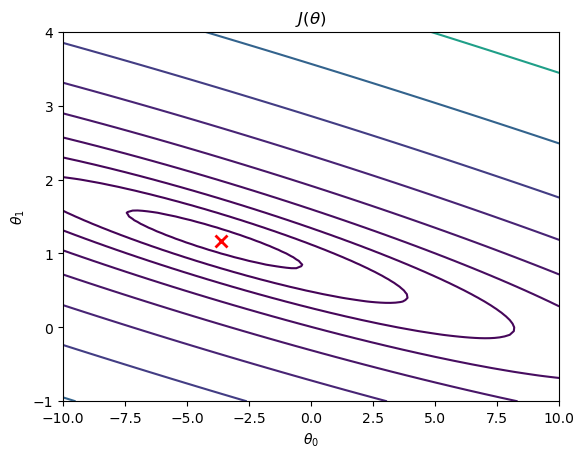

In [28]:
def plot_visualize_cost(X, y, theta_best):
    """可视化代价函数"""

    # 生成参数网格
    theta0_vals = np.linspace(-10, 10, 101) # 生成101个θ_0值 从-10到10
    theta1_vals = np.linspace(-1, 4, 101) # 生成101个θ_1值 从-1到4
    t = np.zeros((2, 1)) # 存储对应的theta值
    J_vals = np.zeros((101, 101)) # 存储对应的theta_0和theta_1
    for i in range(101): # 循环式为了遍历101×101个不同的theta组合，并计算每一组参数下面的代价，填入J_vals中
        for j in range(101):
            # =============== 你的代码 ===================
            # 加入代码，计算 J_vals 的值
            t = np.array([[theta0_vals[i]],
                         [theta1_vals[j]]])
            J_vals[j, i] = compute_cost(X, y, t) 
            # ===========================================

    plt.figure()
    plt.contour(theta0_vals, theta1_vals, J_vals,
                levels=np.logspace(-2, 3, 21))
    plt.plot(theta_best[0], theta_best[1], 'rx',
             markersize=8, markeredgewidth=2)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title(r'$J(\theta)$')
  

plot_visualize_cost(X, y, theta)
plt.show()

在梯度更新时，我们保留了代价的历史信息。在参数的学习过程中，代价函数的变化过程你也可以作一个图来查看。观察最后得到的$J(\theta)$的图像以及代价的变化过程，可以加深你的理解。在梯度下降的迭代中，我们设置终止条件为完成了固定的迭代次数，但是在迭代次数完成时，由于学习率等参数的设置，可能得到的参数并不是使得代价最低的值。你可以通过观察代价函数的变化过程，想办法调整学习率等参数或者改进程序，使得参数的取值为搜索到的最优结果。改进`plot_visualize_cost`绘制模型迭代优化历史。


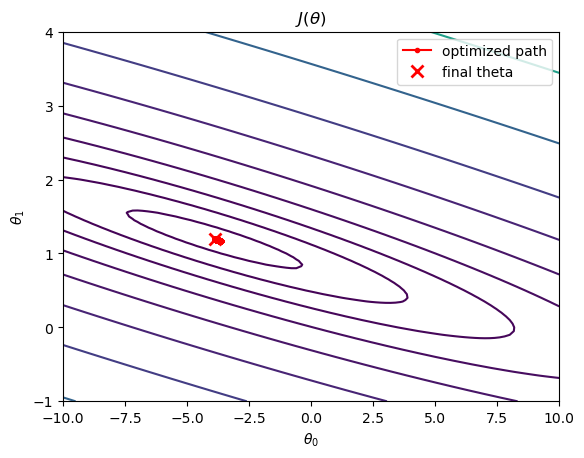

In [10]:
def plot_visual_history(X, y, theta_history):
    plt.figure()
    # =============== 你的代码 ===================
    theta0_vals = np.linspace(-10, 10, 101)
    theta1_vals = np.linspace(-1, 4, 101)
    J_vals = np.zeros((101, 101))
    for i in range(101):
        for j in range(101):
            t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
            J_vals[j, i] = compute_cost(X, y, t)
    
    plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 21)) # 设置对数刻度

    theta_history = np.array(theta_history)
    plt.plot(theta_history[:, 0], theta_history[:, 1], 'r.-', label='optimized path')
    plt.plot(theta_history[-1,0], theta_history[-1, 1], 'rx', markersize=8, markeredgewidth=2, label='final theta')
    plt.legend()
    # ===========================================
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title(r'$J(\theta)$')
    
theta, J_history, theta_history = gradient_descent(X, y, theta, alpha, iterations)
plot_visual_history(X, y, theta_history)
plt.show()

### 进阶
在实现中，你可能采取了像上面公式中给出的结果一样逐个样本计算代价函数，或者在梯度下降的更新时也采用了逐个样本计算的方式。但事实上，你可以采用numpy的矩阵函数一次性计算所有样本的代价函数。可以采用矩阵乘法(np.matmul())求和等方式（np.sum（））。利用你学到的线性代数知识，将其实现更改一下吧。

在梯度更新时，我们保留了代价的历史信息。在参数的学习过程中，代价函数的变化过程你也可以作一个图来查看。观察最后得到的$J(\theta)$的图像以及代价的变化过程，可以加深你的理解。在梯度下降的迭代中，我们设置终止条件为完成了固定的迭代次数，但是在迭代次数完成时，由于学习率等参数的设置，可能得到的参数并不是使得代价最低的值。你可以通过观察代价函数的变化过程，想办法调整学习率等参数或者改进程序，使得参数的取值为搜索到的最优结果。